# 2019/02/19    - test campaign 2, day 7

##    4.6 Measure M1 only LSST bending modes with "F" removed from surface (labeled 3.7; M1 BM 17,18,20; no M3)
##    Fan installation - no further tests

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()
import scipy.io

dateID = 190219

signExecuted = [-1, 1, -1, 1, -1,
               -1, 1, 1, -1, 1,
               1, 1, 1, -1, 1,
               -1, -1, -1, -1, -1,
               1, -1, 1, -1, 1,
               -1, -1]

<Figure size 432x288 with 0 Axes>

### According to Mirror Lab notes, LSST bending modes M1 measurements for 17, 18, and 20 had to be redone.
Because the M1 measurements on the previous day had the letter "F", which they forgot to remove.
But, we don't see letter "F" on the maps from previous day. Perhaps today's data had been used for calculating measured bending modes labelled as yesterday? Looks like that is the case, because today's bending modes (see below) has idential RMS as yesterdays, up to 0.001nm.

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190219 3-7 M1 bm-17-1 burst50 morph.h5: Tue Feb 19 09:06:27 2019 
4-6 bending mode 17 ------ irow = 0, icol = 1, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190219 3-7 M1 bm+17-1 burst50 morph.h5: Tue Feb 19 09:03:14 2019 
4-6 bending mode 17 ------ irow = 0, icol = 2, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190219 3-7 M1 bm+17-2 burst50 morph.h5: Tue Feb 19 09:12:40 2019 
4-6 bending mode 17 ------ irow = 0, icol = 3, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190219 3-7 M1 bm-17-2 burst50 morph.h5: Tue Feb 19 09:09:28 2019 
4-6 bending mode 18 ------ irow = 1, icol = 0, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190219 3-7 M1 bm-18-1 burst50 morph.h5: Tue Feb 19 09:19:06 2019 
4-6 bending mode 18 ------ irow = 1, icol = 1, -----------------------------
/Processed/19

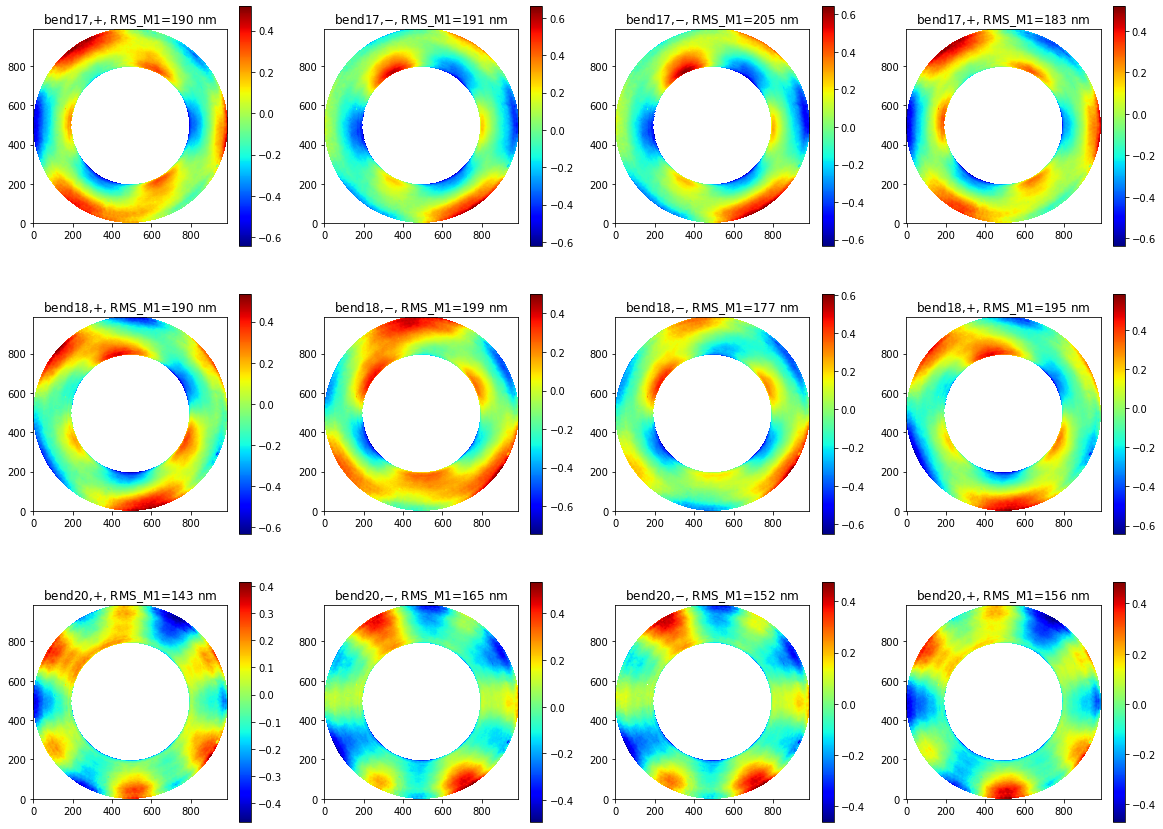

In [2]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(3,4,figsize=(20,5*3))
i = 0
for modeID in np.array([17, 18, 20]):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    signedBend1 = ['-%d-1'%modeID, '+%d-1'%modeID, '+%d-2'%modeID, '-%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, iter, dateID, testID1, bend)))
        if signExecuted[modeID-1]<0:
            fileset[0] = fileset[0].replace(bend, signedBend1[signedBend.index(bend)])
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title(r'bend%d,$%s$, RMS_M1=%.0f nm'%(modeID, bend[0], m1rms))

### These M3 measurements are same the yesterdays', including the file names

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190218 3-7 M3 bm-17-1 burst20 morph -.h5: Mon Feb 18 12:32:38 2019 
4-6 bending mode 17 ------ irow = 0, icol = 1, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190218 3-7 M3 bm+17-1 burst20 morph -.h5: Mon Feb 18 12:31:34 2019 
4-6 bending mode 17 ------ irow = 0, icol = 2, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190218 3-7 M3 bm+17-2 burst20 morph -.h5: Mon Feb 18 12:34:36 2019 
4-6 bending mode 17 ------ irow = 0, icol = 3, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190218 3-7 M3 bm-17-2 burst20 morph -.h5: Mon Feb 18 12:33:31 2019 
4-6 bending mode 18 ------ irow = 1, icol = 0, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/190218 3-7 M3 bm-18-1 burst20 morph -.h5: Mon Feb 18 12:36:46 2019 
4-6 bending mode 18 ------ irow = 1, icol = 1, -----------------------------
/Pr

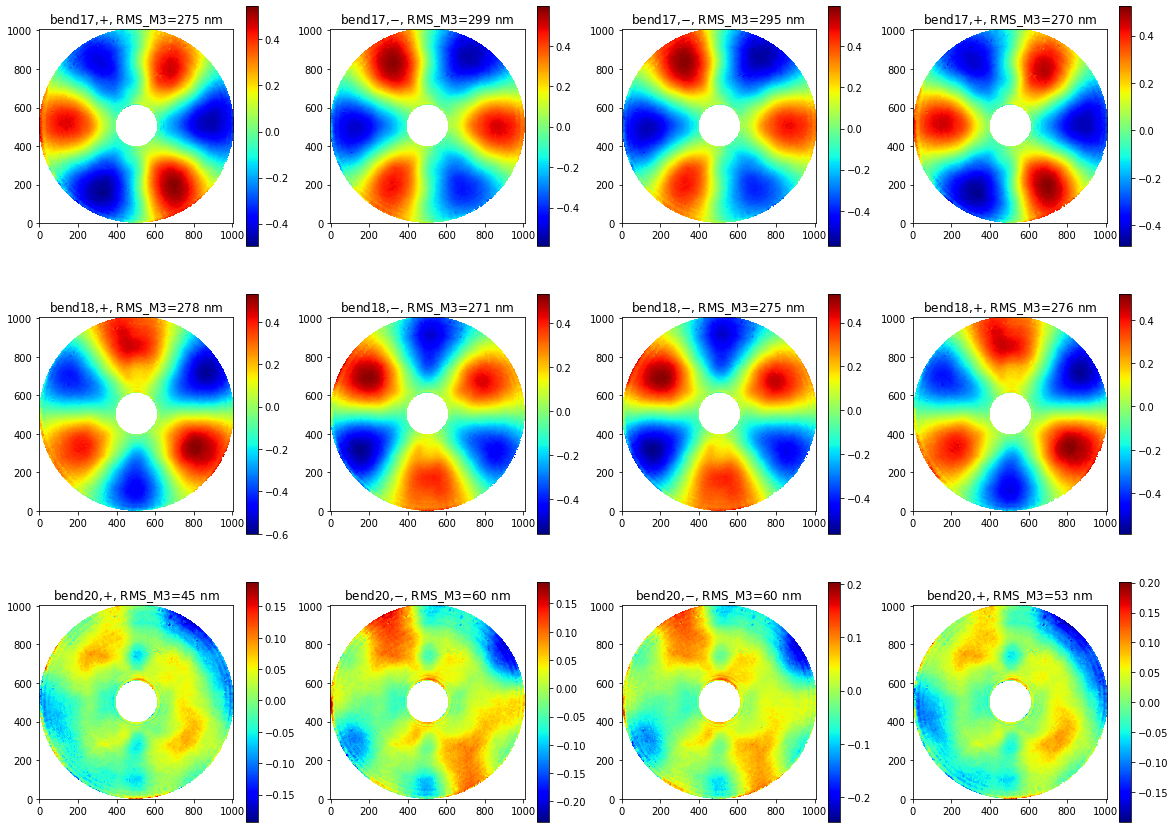

In [3]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(3,4,figsize=(20,5*3))
i = 0
for modeID in np.array([17, 18, 20]):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    signedBend1 = ['-%d-1'%modeID, '+%d-1'%modeID, '+%d-2'%modeID, '-%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s%s/%d %s M3 bm%s*burst*morph -.h5'%(
            dataDir, dateID, testID, iter, dateID-1, testID1, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        if signExecuted[modeID-1]<0:
            fileset[0] = fileset[0].replace(bend, signedBend1[signedBend.index(bend)])
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title(r'bend%d,$%s$, RMS_M3=%.0f nm'%(modeID, bend[0], m3rms))

### The measured bending modes
Mirror Lab scaled the forces and the shapes, so that the forces corresponding to these shapes are still 1N RMS forces

In [4]:
# available in mat: 'Udn3norm','Vdn3norm','Gdn','x','y','dnx','dny','dnz'
mat = scipy.io.loadmat('data/myUdn3norm_156.mat')
Udn3norm = mat['Udn3norm']
Vdn3norm = mat['Vdn3norm']
rmsF = np.std(Vdn3norm[:,:30], axis=0)

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-17.h5: date not in h5 file. 
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-17.h5: date not in h5 file. 
4-6 bending mode 18 ------ irow = 0, icol = 1, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-18.h5: date not in h5 file. 
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-18.h5: date not in h5 file. 
4-6 bending mode 20 ------ irow = 0, icol = 2, -----------------------------
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-20.h5: date not in h5 file. 
/Processed/190219_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-20.h5: date not in h5 file. 


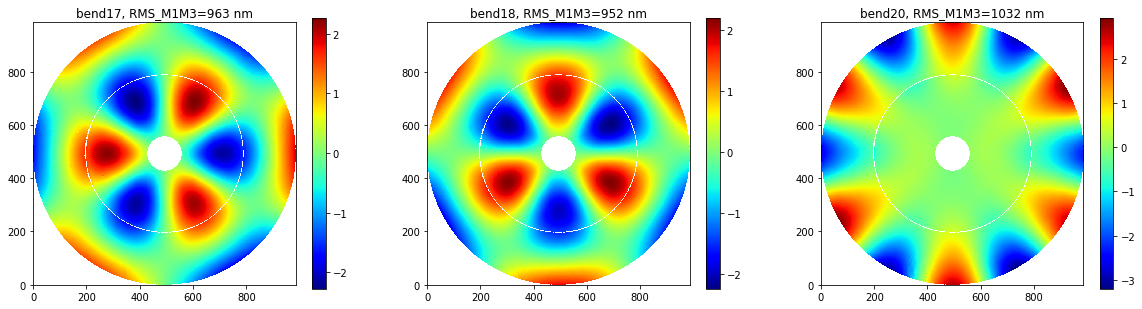

In [5]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for modeID in np.array([17, 18, 20]):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, iter, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    m1s = m1s*rmsF[modeID-1] #normalize to FEA forces
    m3s = m3s*rmsF[modeID-1]
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3) * signExecuted[modeID-1]
    
    m1rms = np.std(m1s[~np.isnan(m1s)])
    m3rms = np.std(m3s[~np.isnan(m3s)])
    srms = np.std(s[~np.isnan(s)])*1000 #convert into nm

    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol], ticks=[-3,-2,-1,0,1,2,3])
    ax[icol].set_title('bend%d, RMS_M1M3=%.0f nm'%(modeID, srms))